In [1]:
import matplotlib.pyplot as plt
import src.utils as pth
from PIL import Image
import pandas as pd
import numpy as np
import os

PROJECT_ROOT = pth.get_project_root()
IMAGE_BASE_FOLDER = os.path.join(PROJECT_ROOT, 'data', 'images')

def get_img_path(image_name): 

   return os.path.join(IMAGE_BASE_FOLDER, image_name)   

def show_image(image_name): 

   image_path = get_img_path(image_name)
   img = Image.open(image_path) 
   img = img.resize((512, 512))
   img_arr = np.array(img)
   plt.imshow(img_arr) 

In [2]:
#Will look at the entire dataset
dbset = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'images_metadata_clr.parquet')) # 'processed'

In [15]:
pd.concat([dbset.head(2), dbset.tail(2)])

,id,title,image_name,color
754,30695,rosehip fit flare dress,db2a1e93-3a6c-4c05-bf18-00ee6be05bd3.jpeg,Tomato
6292,81404,live in pocket joggers pants,285af35b-a2b9-40d0-a153-2852a6106ba9.jpeg,Black
19127,24830,bryson shirtdress,444ad161-b4f1-46cf-97e0-d6b9ac17c402.jpeg,Blush
14790,55732,jarvis jacquard blazer,b9def405-9bdf-4250-bb0d-59a90ab042ef.jpeg,Grey Forest


In [13]:
dbset.sample(4, random_state = 45)

,id,title,image_name,color
15383,40979,ask me about my aura ringer tee,042b77f8-6950-4904-89c5-ff6ef00834c7.jpeg,Black
3160,125973,august hat marina downbrim derby hat,69aeb517-c66c-47b8-af7d-bdf1fde57ed0.jpeg,Natural
18511,40453,morning x ma pullover,e2d8637a-5478-429d-a2a8-3d5859dbc64d.jpeg,Black
13705,81095,brushstroke floral print knit top,0a65b52c-fef3-4ada-84a3-31e40a139c19.jpeg,Green


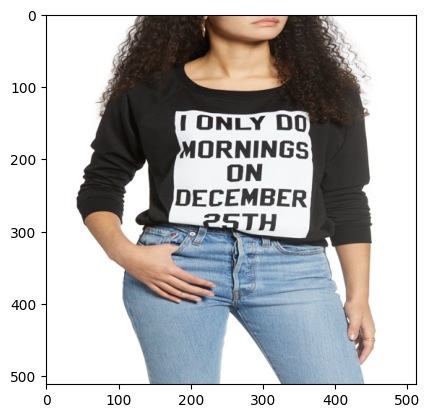

In [42]:
#"x ma"  can be xma which means christmas. Let's check the image to understand

show_image('e2d8637a-5478-429d-a2a8-3d5859dbc64d.jpeg')

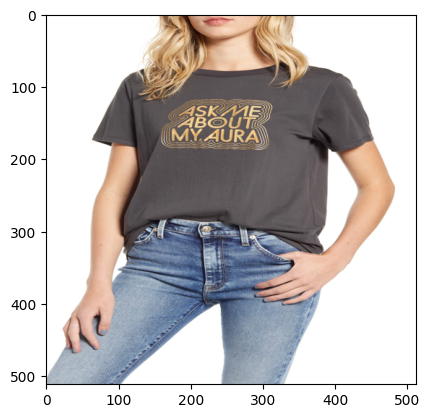

In [43]:
show_image('042b77f8-6950-4904-89c5-ff6ef00834c7.jpeg')

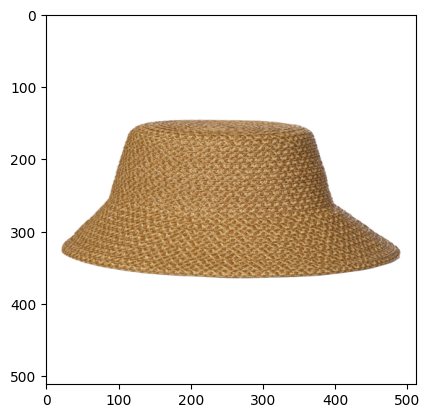

In [44]:
show_image('69aeb517-c66c-47b8-af7d-bdf1fde57ed0.jpeg')

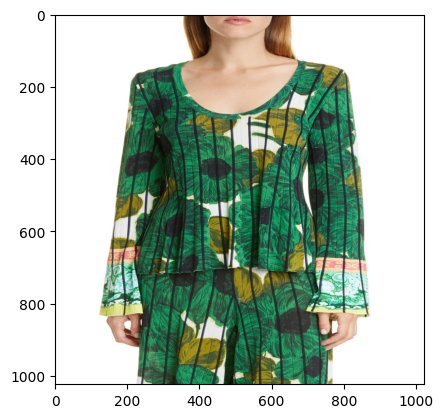

In [35]:

show_image('0a65b52c-fef3-4ada-84a3-31e40a139c19.jpeg')

**Observation:** 

* Some title have duplicate words in them like title of image_id=125973 have "hat" is more then once. For caption repetition of the same word to describe the item is not helpfull.
* There are title with single letter. e.g text having "x","t". If it was "a" it make sence.
* Last word of the title is the type of the product. And other text describle either the brand, some writen text on the product item or item itself

In [263]:
#Check are there any punctuation/special chars (!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~) in "title" feature. 
import string
import re

def check_punctuation(text):

    pattern = "[" + string.punctuation + "]"
    match = re.findall(pattern,text)

    if match:
        return ''.join(match)
    else:
        return ''.join(match)

In [ ]:
%%time
dbset['is_punctuation_exists'] = dbset['title'].apply(lambda x: check_punctuation(x))

In [28]:
#Number of records having punctuation's
dbset.is_punctuation_exists.value_counts()

      17865
-       157
--        3
Name: is_punctuation_exists, dtype: int64

In [37]:
dbset[dbset.is_punctuation_exists.isin(['-'])].title.values

array(['pearl one one-piece swimsuit', 'roan one one-piece swimsuit',
       'ibiza one one-piece maternity swimsuit',
       'belmont stripe oceanus underwire one one-piece swimsuit',
       'sequin lace mock two one-piece gown',
       'front zip one one-piece swimsuit',
       'two cool bandeau one one-piece swimsuit',
       'island goddess one one-piece swimsuit',
       'ball chain one-piece of 3 necklace',
       'pansy print ruched one one-piece swimsuit',
       'havana slim fit solid wool three one-piece suit',
       'calabasas ribbed one one-piece swimsuit',
       'active zigzag underwire one one-piece swimsuit',
       'salento leroux one one-piece swimsuit',
       'sarah star one-piece of 2 imitation pearl stretch bracelet',
       'parker skirted one one-piece swimsuit',
       'rainbow mommy me one-piece',
       'lazio slim fit solid wool three one-piece suit',
       'sequin mock two one-piece dress', 'aubrey one one-piece swimsuit',
       'oritsei ruched one one-p

In [36]:
dbset[dbset.is_punctuation_exists.isin(['--'])].title.values

array(['two one-piece charmeuse and chiffon long sleeve top pants one-piece',
       'namaste two one-piece lounge one-piece',
       'tankini 2 one-piece swim maternity one-piece'], dtype=object)

In [38]:
dbset.drop(['is_punctuation_exists'], axis=1, inplace=True)
dbset.columns

Index(['id', 'title', 'image_name', 'color'], dtype='object')

**Observation:**

* '-' is only special char used in all the 'title'. Will replace it with space.
* ' is not used in the 'title', so no need to apply expand contractions(i.e can't = can + not).
* all the text in 'title' are in lower case. 'color' feature require to apply lower case.
* no accented characters like â, î, or ô in 'title'

In [279]:
#check for color feature
dbset['is_punctuation_exists'] = dbset['color'].apply(lambda x: check_punctuation(x))
dbset.is_punctuation_exists.value_counts()

        17281
/        2087
//        298
-         267
/-         26
///        24
.          13
-/         10
--          8
()          4
//-         3
////        1
.-          1
/-/         1
...         1
:           1
/.          1
/()         1
Name: is_punctuation_exists, dtype: int64

In [280]:
dbset.drop(['is_punctuation_exists'], axis = 1, inplace=True)
dbset.columns

Index(['id', 'title', 'image_name', 'color'], dtype='object')

In [282]:
#with pd.option_context("display.max_rowwidth", None):

unique_color = dbset.color.unique()
#comment as the output is large
#print(*unique_color)

In [284]:
for word in unique_color:
    print(word)

Gold
Black Leather
Light Blue
Anthracite Leather
Black
Bright Ivory
Periscope
Asparagis Green/Mix
Dirt
Black Ripstop
Taupe
Blush Satin
Noir
Midnight Blue/ Black
Disguise
105-Ivory
Musk
Multi
Sky Blue
Skyfall Med
Khaki
Olive Stripe
Classic Navy
Mare Navy
Barbara
Dusty Rose/ Washed Indigo
Black And Ivory Ticker
Bismark
Dorsey
Navy Gingham Dots
Sea Salt
Silver
Ivory Sunrise
Rosewater Tie Dye
Camo
Cream
Anthracite
Autumnal Brown
Ivory
Cream/ Mint
Tie Dye Ctn
Tangerine
Black/ Safety Orange
Grey/ Ivory Zebra Tie Dye
Open Grey
Rose Smoke
Anne Black/ Anne White
Iride
Periwinkle Violet
Camel
Navy
Ath Anthracite
Charcoal Solid Marl
Antracite Grey Melange
Burgundy Punch
Tomato Red
Blk
Madras Blue
Beige Vegan Leather
Hazy Blue
Black/ Ivory
Ivory Tortoise/ Green
Lemon
Beige
Fiesta
Greige
Blue
Bright White
Silk White
Latte Colored Denim
Blue Paisley
Soft White
Sage Gingham
Black Suede
Blue Multi
Fatigue
Cream Leopard
Suspicious
Black/ Blackened Pearl
Print/ Black
Grey
Camel Leather
Black Canvas
Red


**Observation:**

* special chars. Will replace it with blank.
* numeric value in color feature. Will replace it with blank.
* certain value starts with 'only 1 left', '- Only 2 left'. This is not color but number of quantity.
* color with only one word. e.g 'T/ D','- 0218 - Combo B','14k Gold', 'Smoke 90s','17-Combo A'
* extra space between the colors
* certain value have word like '1 Year' e.g '1 Year Worn','11 Years Egress', '3 Years'

In [ ]:
#correcting mis-spelled words. There are library which is possible. Not very mature.

### Word with one or two character ###

In [3]:
import re

# Let's look for item where title has word with only one char (which are not stopwords) and create a dictonary
# Reason to do this is like in a case we had "t" word which could meanse "the". 
# So it's possible that words other then "a" is short form of other word that we can understand by reading the test of he title. 

#List of word with 1 and 2 char except stopwords

def contain_word_with_single_char(dbset, colname = 'title'):

    stopwords = ['an', 'be', 'do', 'of', 'is', 's', 'am', 'or', 'as', 'we', 'me','up', 'to', 'no', 'at', 'in', 'on', 'so', 'he',  'i', 't', 'if', 'my', 'a', 'by', 'it' ]

    dict_item_with_single_char_caption = {}

    for image_id, title in zip(dbset['id'], dbset[colname]):

        #Search in text have only one char or have text has word with only 2 char
        match = re.findall(r'\b[\w]{1,2}\s', title)
        if match:  

            match = [item.strip() for item in match if not item.strip() in stopwords]
            if len(match) > 0:
                
                if image_id not in dict_item_with_single_char_caption:
                    dict_item_with_single_char_caption[image_id] = []

                dict_item_with_single_char_caption[image_id] = dict_item_with_single_char_caption[image_id] + match
            

        #Search if the text has numeric 
        match = re.findall(r'\d+', title)
        if match:
            
            match = [item.strip() for item in match if not item.strip() in stopwords]
            if len(match) > 0 :
                
                if image_id not in dict_item_with_single_char_caption:
                    dict_item_with_single_char_caption[image_id] = []

                dict_item_with_single_char_caption[image_id] = dict_item_with_single_char_caption[image_id] + match

    return dict_item_with_single_char_caption


dict_item_with_single_char_caption = contain_word_with_single_char(dbset)

In [4]:
len(dict_item_with_single_char_caption.keys())

1980

In [61]:
dict_item_with_single_char_caption

{111712: ['1082', '54'],
 65253: ['ii'],
 664: ['4g', '4'],
 107673: ['x'],
 123859: ['2', '2'],
 36314: ['la'],
 74710: ['1', '1'],
 124054: ['58'],
 5066: ['3', '3'],
 86737: ['2', '2'],
 15146: ['x'],
 86841: ['3', '3'],
 69927: ['dr'],
 119727: ['5', '5'],
 12654: ['50', '50'],
 112023: ['54'],
 116702: ['le'],
 66243: ['3', '3'],
 96187: ['50', '50'],
 36408: ['gg'],
 99432: ['mc'],
 59777: ['3', '3'],
 119591: ['34'],
 36534: ['x', 'e'],
 116382: ['le'],
 132623: ['ii'],
 59165: ['2', '2'],
 119545: ['x'],
 66877: ['ex'],
 114225: ['gg'],
 111801: ['62'],
 62975: ['4', '0', '4', '0'],
 31671: ['ab'],
 124122: ['58'],
 83760: ['2', 'se', '2'],
 112423: ['22', '22'],
 121358: ['14'],
 7601: ['3', '3'],
 72876: ['v'],
 97967: ['ab'],
 2484: ['v'],
 86463: ['d'],
 78285: ['x'],
 73246: ['x'],
 37407: ['3', '3'],
 111958: ['62', '2'],
 127584: ['z'],
 129592: ['1460'],
 65271: ['2', '2'],
 103537: ['fx'],
 126038: ['49'],
 110837: ['18'],
 73801: ['d'],
 69653: ['v'],
 69895: ['7', '7

In [79]:
#Let's look at some of the title where the char does not make sence

dbset[dbset['id'].isin([36314, 15146, 36408, 99432, 73246, 12164, 123795, 116702, 69927, 36534])]

,id,title,image_name,color
54,36314,la vie superbe logo graphic tie dye cotton hood,3d79a898-be81-4094-951a-1d34b46dc844.jpeg,Tie Dye Ctn
102,15146,x hot summer night two pea ruffle faux wrap skirt,2ed04dba-8bcb-49d3-808f-54b6168154b2.jpeg,Cream Leopard
108,69927,dr awkward performance crew sock,b5d05ff8-26ae-4a8f-aa85-3b345b127ebf.jpeg,Grey
204,116702,extra large le pliage club travel tote,c34c2fa7-b7ea-4cfe-95ce-1e8468ececce.jpeg,Black
223,36408,gg rhombus trench coat with removable cape,abd8f339-40e1-4b6a-9e56-07a4a8d05210.jpeg,Beige/ Mix
232,99432,mc pleated crop trousers,b5e2c48e-1fb6-4a95-b11a-0781a93d27cb.jpeg,Mud Brown
242,36534,x atlantic pacific soir e embellished sweater,de2531a5-8e11-453d-a634-cb183c3efa8a.jpeg,Black- Ivory Pearl Soriee
458,73246,beam x new era los angeles dodger hood,ca4b85b3-9d7a-4e9d-90b6-eddb37bd6079.jpeg,Heather Grey
10249,123795,al the chemist 52mm reading glass,b1e31996-134d-4ccf-8201-901115543a9a.jpeg,Sand
10270,12164,v neck linen blend sweater,7d765a21-ddd6-4103-b57e-c65997d6d86c.jpeg,White


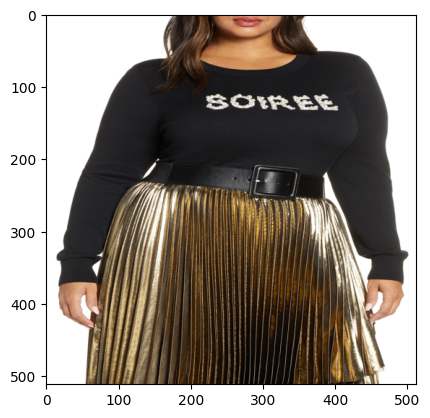

In [80]:
show_image('de2531a5-8e11-453d-a634-cb183c3efa8a.jpeg')

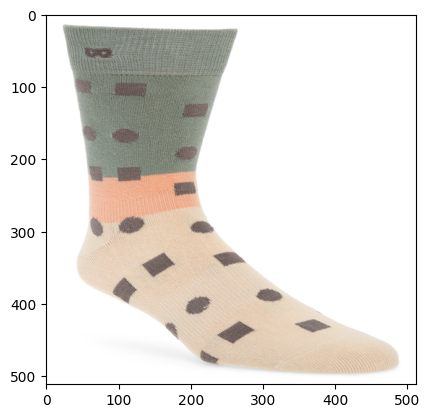

In [78]:
show_image('b5d05ff8-26ae-4a8f-aa85-3b345b127ebf.jpeg')

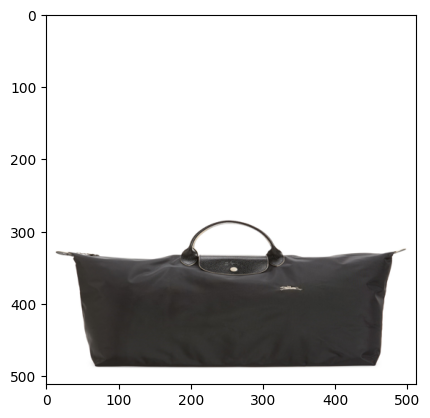

In [76]:
show_image('c34c2fa7-b7ea-4cfe-95ce-1e8468ececce.jpeg')

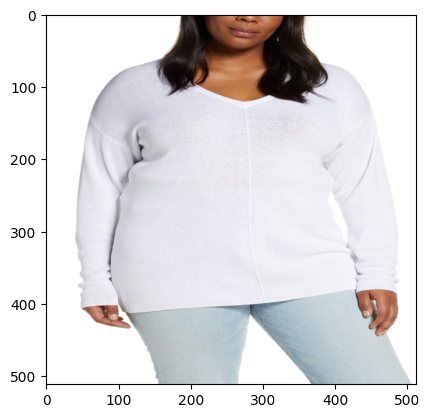

In [74]:
show_image('7d765a21-ddd6-4103-b57e-c65997d6d86c.jpeg')

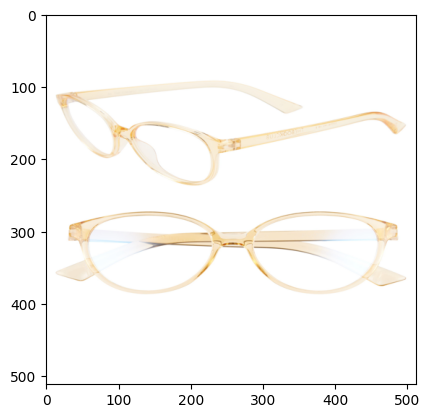

In [73]:
show_image('b1e31996-134d-4ccf-8201-901115543a9a.jpeg')

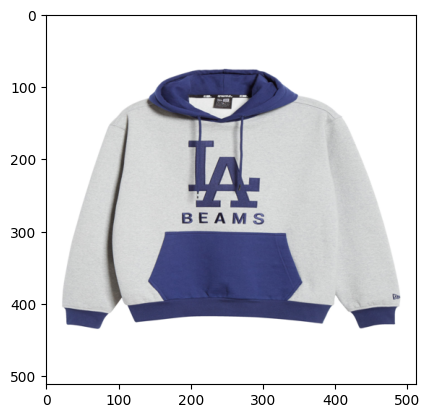

In [70]:
show_image('ca4b85b3-9d7a-4e9d-90b6-eddb37bd6079.jpeg')

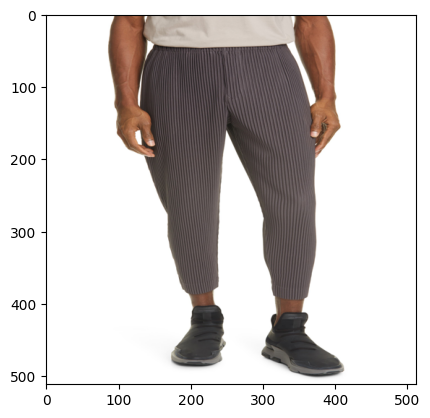

In [68]:
show_image('b5e2c48e-1fb6-4a95-b11a-0781a93d27cb.jpeg')

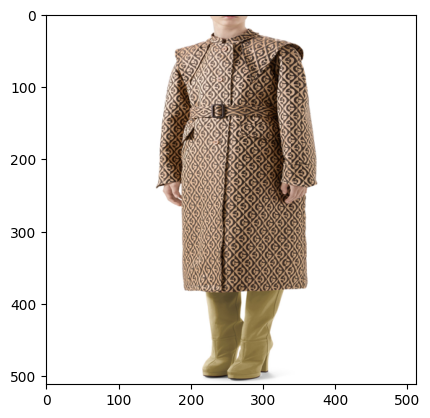

In [66]:
show_image('abd8f339-40e1-4b6a-9e56-07a4a8d05210.jpeg')

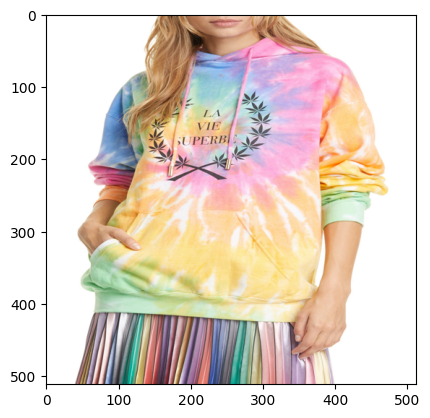

In [63]:
show_image('3d79a898-be81-4094-951a-1d34b46dc844.jpeg')

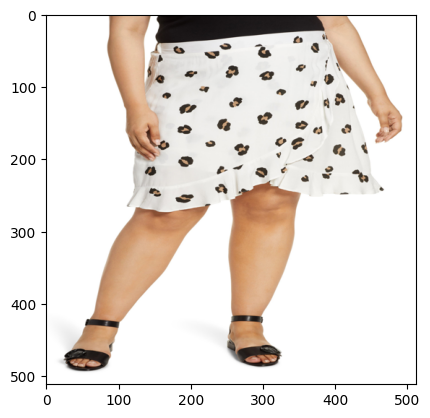

In [64]:
show_image('2ed04dba-8bcb-49d3-808f-54b6168154b2.jpeg')

**Observation:**
* 'v' :stand for the neck type of t shirt i.e 'V' neck
* 'le': logo on the shirt
* 'x': did not gave much information on the cloth
* Most of the 2 letter word don't have any meaning. They are either the logo on the item or the brand name.

Let's drop those letter with 1 and 2 char which are not stopwords

### Numeric value in text ###

In [83]:
#Lets look at the numeric words in the title

dbset[dbset['id'].isin([96187, 66243, 112023, 119727, 119591, 5066, 74710, 123859, 126935, 119464, 127003])]

,id,title,image_name,color
39,123859,2 pack heart crystal hair clip,f20c0f99-af2d-4141-990f-070a320796bd.jpeg,Silver
58,74710,sportswear air force 1 stacked logo hood,a4972258-e621-4114-866d-09c7de6a1648.jpeg,Black/ Safety Orange
90,5066,3 pack color mood supersoft liner sock,7af87097-1b2f-4c43-bb91-e6245ca88575.jpeg,Blue
125,119727,one-piece of 5 stacking statement ring,dcd9c22e-da4a-47b4-b6e0-82a6bdc81035.jpeg,Clear- Black- Gold
171,112023,chris 54mm gradient lens sunglass,f5bbaa53-cfa4-4790-b073-60ebc45e586f.jpeg,Black
206,66243,3 pack cotton thongs,cd355aad-60d4-4f72-9d6a-c0f9c1528594.jpeg,Black/ Heather Grey/ Charcoal
207,96187,spell upf 50 maternity tank top,bc87641d-b5bf-4e52-b1e0-e6a84a23c2fc.jpeg,Raven Black
239,119591,bold bracelet watch 34mm,34cf5219-f508-447f-89b0-46581bf6c82d.jpeg,Gold
1631,119464,t classic gentleman powermatic bracelet watch ...,e74c0b24-57f9-491d-9704-27ab5400e9d9.jpeg,Grey/ Black/ Silver
1652,126935,avery 58mm cat eye sunglass,53a8fa33-6537-42eb-92b2-b79ecc0783d4.jpeg,Sea Turtle Tortoise/ Brown


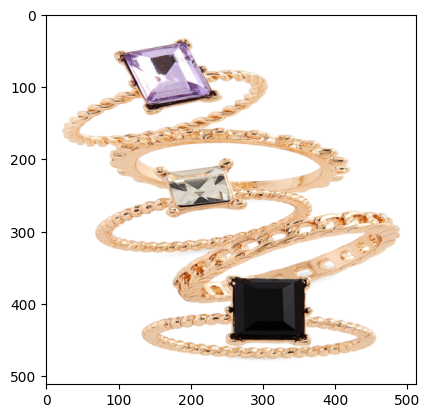

In [85]:
show_image('dcd9c22e-da4a-47b4-b6e0-82a6bdc81035.jpeg')

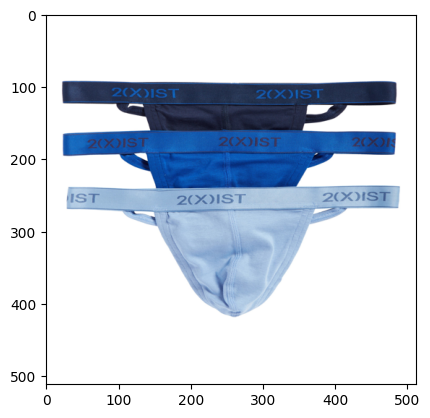

In [84]:
show_image('cd355aad-60d4-4f72-9d6a-c0f9c1528594.jpeg')

**Observation:**
* One digit numeric specify the number of quantity, let's convert them into words.
* Two digit numeric followed by measurement specify size of the item. We can remove the number and the measurement 

In [139]:

dbset[dbset['id'].isin([84800, 129592, 111712, 125389, 119318, 124424, 104666, 126537, 36029, 93718, 122778])]

,id,title,image_name,color
8,111712,1082 s 54mm sunglass,e6856b0e-dcff-4564-875e-619afb570792.jpeg,Black
483,129592,1460 pascal boot,4bb70187-c19a-4e1c-8269-4f2661ebef05.jpeg,Black Virginia
532,84800,1964 waterproof boot,7eea8af0-5328-4fdf-8049-dc588c5219e8.jpeg,Black
794,119318,amulet vehicle box chain necklace with 18k yel...,ad3117db-c00a-4dfe-8d75-c057434e44ed.jpeg,Gold/ Silver
797,125389,135mm shield sunglass,e0546b87-3cb9-4f35-896c-83b4462b97f8.jpeg,Blue/ Dk Grey Gradient
877,124424,woodstock 6 7 8 plus iphone case,2a6c6213-2576-49a5-819d-91427b89a0f2.jpeg,Pink
1608,126537,facet iphone 7 plus 8 plus case,bc053a2b-cb6e-4634-85c1-cdaa9a92ac8c.jpeg,Rose Gold
1698,104666,501 original denim shorts,5d25f2ee-aa82-4e09-b2e7-728dcd69ba52.jpeg,Tango Dibs Plus Short
1744,36029,x 2 moncler 1952 narvalong net overlay convert...,58520047-9a74-4dbe-bf18-b52a7941a9c1.jpeg,White
1867,93718,11 inch high waist jeans jeans,06c9ba23-f717-4378-9dc1-38221059e8e5.jpeg,Longridge Wash


In [118]:
dbset[dbset['id'].isin([119318, 36029])].values

array([[119318, 'amulet vehicle box chain necklace with 18k yellow gold',
        'ad3117db-c00a-4dfe-8d75-c057434e44ed.jpeg', 'Gold/ Silver'],
       [36029,
        'x 2 moncler 1952 narvalong net overlay convertible 2 in 1 down puffer coat',
        '58520047-9a74-4dbe-bf18-b52a7941a9c1.jpeg', 'White']],
      dtype=object)

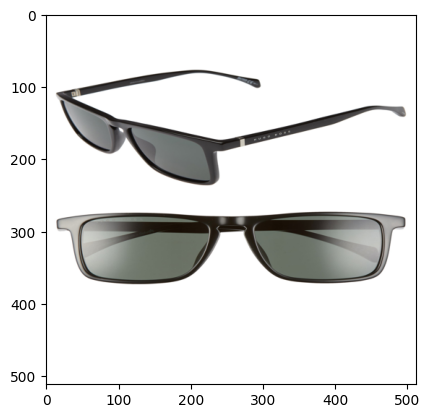

In [102]:
show_image('e6856b0e-dcff-4564-875e-619afb570792.jpeg')

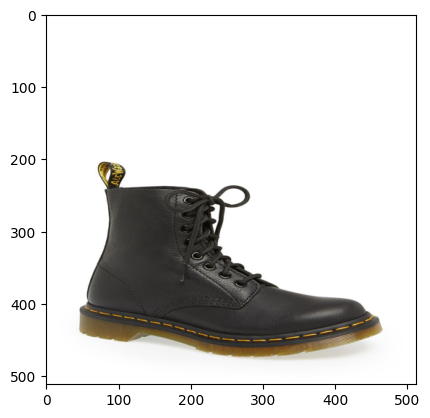

In [101]:
show_image('4bb70187-c19a-4e1c-8269-4f2661ebef05.jpeg')

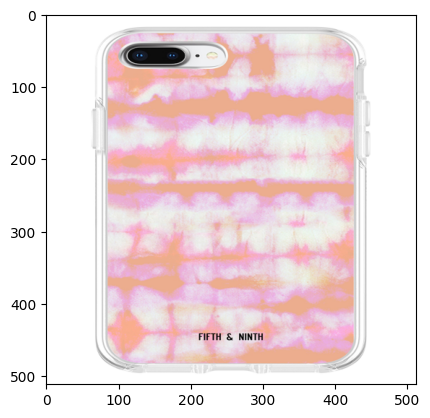

In [100]:
show_image('2a6c6213-2576-49a5-819d-91427b89a0f2.jpeg')

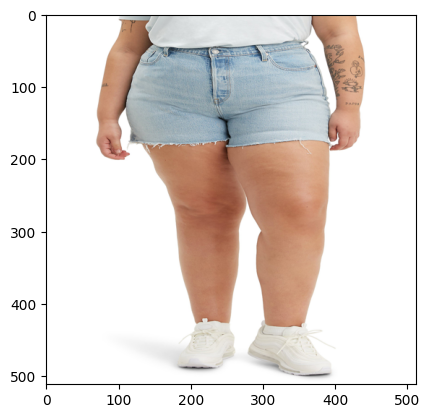

In [99]:
show_image('5d25f2ee-aa82-4e09-b2e7-728dcd69ba52.jpeg')

**Observation:**

* Numeric value more then one digit represent the somekind of old year fashion.
 

### Pre-Processing ###

#### **'title' feature:** ####

    Points consider for cleaning: 

    1. converts to lowercase
    2. replace special chars '-' from title
    3. remove any extra spaces between the words
    4. remove repeated words.
    5. remove 1 or 2 char words which are not stopwords.
    6. remove numbers in text. 
        * convert one digit numeric number to words.
        * Some title have the size of the item i.e numeric e.g "32mm". Such word we need to remove both the number and the metric that define the number.

    Notes:
    * Sequence of the cleaning data matter. If remove punctuation before expand contraction will fail contraction
    * There are not html, urls in the title data. We can verfiy with reg expression
    * Other cleaning points like remove stopwords, stemming and lemmatization is not relevent since the output that we shall generate should be proper english. These technique matter if we are using the text data for classification/regression problem where the grammar of the words does not matter only the meaning matter for final output. We will output sequence of words to form a sentence that describe the image. We do not want just the words but form a sentence using those words.

In [5]:
import string
import re

def number_2_word(n):
 
    arr = ['zero','one','two','three','four','five','six','seven','eight','nine']

    # If all the digits are encountered return blank string
    if(n == 0):
        return ""
     
    else:
        # compute spelling for the last digit
        small_ans = arr[n%10]
 
        # keep computing for the previous digits and add the spelling for the last digit
        ans = number_2_word(int(n/10)) + small_ans + " "
     
    # Return the final answer
    return ans

def clean_title_feature(text):

    #remove punctuation
    pattern = '[' + string.punctuation + ']'
    text = re.sub(pattern, '', text)

    ## convert to lower
    text = text.lower()

    ## remove any extra spaces in the text
    text = " ".join(text.split()) 

    ## clean numeric in text
    #Remove numeric with some measure 
    # Most common type of measurement cm: centimeter, inch, mm: millimeter,foot, k: killometer

    pattern = r'\d+[a-z]+' #This will consider eg. 32mm, 18k, 23cm etc
    text = re.sub(pattern, '', text)
    
    pattern = r'(\d+\s+(inch|cm|mm|k))' #This will consider eg. 32 inch, 501 k, 55 cm etc
    text = re.sub(pattern, '', text)

    #Remove numeric pattern like "woodstock 6 7 8 plus iphone case", "facet iphone 7 plus 8 plus case"
    pattern = r'[\d+\s+]+plus'
    text = re.sub(pattern, '', text)
    
    #Remove numeric pattern like "shannon iphone 11 11 pro 11 pro max folio case"
    pattern = r'[\d+\s+]+pro' 
    text = re.sub(pattern, '', text)

    #Remove numeric value of type like year or digit more the 2 char
    pattern = r'\d{2,}'
    text = re.sub(pattern, '', text)

    #Remove numeric values
    pattern = r'\d+'
    text = re.sub(pattern, lambda x: number_2_word(int(x.group())), text)

    #remove word with one or two char other then stopwords
    stopwords = {'an', 'be', 'do', 'of', 'is', 's', 'am', 'or', 'as', 'we', 'me','up', 'to', 'no', 'at', 'in', 'on', 'so', 'he', 'i', 't', 'if', 'my', 'a', 'by', 'it' }
    pattern = r'\b[\w]{1,2}\s'
    fiter = re.finditer(pattern, text)

    replace_index = []

    try:

        while(True):

            idx = fiter.__next__().span()            

            if not text[idx[0]:idx[1]].strip() in stopwords:
                replace_index.append(idx)            

    except StopIteration:
        #end of the iter reached
        pass
    
    for i in range(len(replace_index), 0, -1):
                
        idx = replace_index[i - 1]
        text = text[0:idx[0]] + text[idx[1]:]

    #remove duplicate words
    # help reference: https://www.geeksforgeeks.org/remove-duplicate-words-from-sentence-using-regular-expression/ did not work since it only remove duplicate if the word repeat next to each other
    # did not work
    #pattern = r'\b(\w+)(?:\W+\1\b)+' 
    #text = re.sub(pattern, r'\1', text, flags = re.IGNORECASE)

    #only keep the last occurance. as observed most on the time the repeated word is the product type and we have observed that product type usually the last word in the title of the item
    split_text = text.split()
    split_text.reverse()
    text = []
    for word in split_text:
        if word in text:
            continue
        else:
            text.append(word.strip())

    ## join the string back after removing duplicate
    text.reverse()
    text = " ".join(text) 
    
    return text.strip()

##### Train data #####

In [6]:
db_train = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'train_data.parquet'))  

In [7]:
%%time

#apply cleaning on the 'title' feature
db_train['clean_title'] = db_train['title'].apply(lambda x: clean_title_feature(x))

CPU times: total: 422 ms
Wall time: 534 ms


In [8]:
db_train.head()

,id,title,image_name,color,clean_title
754,30695,rosehip fit flare dress,db2a1e93-3a6c-4c05-bf18-00ee6be05bd3.jpeg,Tomato,rosehip fit flare dress
6292,81404,live in pocket joggers pants,285af35b-a2b9-40d0-a153-2852a6106ba9.jpeg,Black,live in pocket joggers pants
10756,110695,aidan cuff link,fe4ce0e1-8306-4d61-ba7d-8665a9e9cbb9.jpeg,Blk,aidan cuff link
1873,12043,back of chair long cardigan,4879469f-93fb-4e01-b5e6-b03b52a49ab7.jpeg,Black Onyx,back of chair long cardigan
9800,133736,bala 2 suede sandal,b9912539-6d3b-4c73-bc82-92e3688255f1.jpeg,Peony,bala two suede sandal


In [9]:
#verfiy if we have remove word with 1 and 2 char, removed numeric data 
dict_item_with_single_char_caption = contain_word_with_single_char(db_train, 'clean_title')
len(dict_item_with_single_char_caption.keys())

0

##### Valid data #####

In [10]:
db_valid = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'validate_data.parquet'))
db_valid.shape  

(1902, 4)

In [11]:
%%time

#apply cleaning on the 'title' feature
db_valid['clean_title'] = db_valid['title'].apply(lambda x: clean_title_feature(x))

CPU times: total: 62.5 ms
Wall time: 65.7 ms


In [12]:
db_valid.head()

,id,title,image_name,color,clean_title
14410,89990,rowan high top sneaker,017bdec5-0904-4aad-a064-9015dc61e290.jpeg,Black,rowan high top sneaker
9458,37053,pointelle wool cotton turtleneck sweater,ba8ed7f8-e65a-4849-bc83-6a4d44e265d9.jpeg,Black,pointelle wool cotton turtleneck sweater
10847,18355,soliman tiered minidress,a23f2176-15a8-46e1-9d75-bd4b5e43c099.jpeg,Black,soliman tiered minidress
9131,23582,romper,9ee645c7-513f-4867-a1b6-64eaaf61690c.jpeg,Black,romper
11487,39540,snowfall low rise thongs,30ff69cc-3684-4e1d-adc4-1b5bb08dde21.jpeg,Black/ Whit,snowfall low rise thongs


In [13]:
db_valid.shape 

(1902, 5)

In [14]:
#verfiy if we have remove word with 1 and 2 char, removed numeric data 
dict_item_with_single_char_caption = contain_word_with_single_char(db_valid, 'clean_title')
len(dict_item_with_single_char_caption.keys())

0

##### Test data #####

In [15]:
db_test = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'test_data.parquet'))  
db_test.shape

(101, 4)

In [16]:
%%time

#apply cleaning on the 'title' feature
db_test['clean_title'] = db_test['title'].apply(lambda x: clean_title_feature(x))

CPU times: total: 0 ns
Wall time: 5.67 ms


In [17]:
db_test.head()

,id,title,image_name,color,clean_title
12148,132094,tenley woven wedge platform sandal,007497af-ed1c-46ae-8246-2141357b286b.jpeg,Black Leather,tenley woven wedge platform sandal
1079,42082,good leg athletic stripe high waist ankle jean...,d37f73ec-e407-45ce-9186-f5e233cd7d1e.jpeg,Black064,good leg athletic stripe high waist ankle jeans
13206,34994,iridescent performance bike shorts,5058f771-fd36-4824-9373-4f6caa870330.jpeg,Oxygen Purple,iridescent performance bike shorts
12851,118715,medium antigona box leather satchel,f6ec0636-cff5-484a-8154-0bc2cd567dfe.jpeg,Black,medium antigona box leather satchel
14702,63300,classic fit print cotton tee,2e7d6892-8277-4b39-b9ec-5d3b56bc9271.jpeg,Turquoise,classic fit print cotton tee


In [18]:
#verfiy if we have remove word with 1 and 2 char, removed numeric data 
dict_item_with_single_char_caption = contain_word_with_single_char(db_test, 'clean_title')
len(dict_item_with_single_char_caption.keys())

0

#### **'color' feature:** ####

Points consider for cleaning: 

    1. converts to lowercase.
    2. replace special chars color.
    3. remove any extra spaces between the words.
    5. remove 1 or 2 char words.
    6. remove numbers in text. 
        * value starts with 'only 1 left', '- Only 2 left'. 
        * color with only one word. e.g 'T/ D','- 0218 - Combo B','14k Gold', 'Smoke 90s','17-Combo A'
        * values have word like '1 Year' e.g '1 Year Worn','11 Years Egress', '3 Years'
    7. extra space between the colors       

In [19]:
def clean_color_feature(text):

    #remove punctuation
    pattern = '[' + string.punctuation + ']'
    text = re.sub(pattern, '', text)

    ## convert to lower
    text = text.lower()

    ## remove any extra spaces in the text
    text = " ".join(text.split()) 

    ## clean numeric in text
    #Remove numeric with some measure 
    # Most common type of measurement cm: centimeter, inch, mm: millimeter,foot, k: killometer

    pattern = r'\d+[a-z]+' #This will consider eg. 32mm, 18k, 23cm etc
    text = re.sub(pattern, '', text)
    
    #Remove numeric pattern like "1 Year", "11 Year"
    pattern = r'[\d+\s+]+years'
    text = re.sub(pattern, '', text)
    pattern = r'[\d+\s+]+year'
    text = re.sub(pattern, '', text)

    #Remove numeric pattern like 'only 1 left', 'Only 2 left'
    pattern = r'only[\s+\d+]+lefts'
    text = re.sub(pattern, '', text)
    pattern = r'only[\s+\d+]+left'
    text = re.sub(pattern, '', text)

    #Remove numeric values
    pattern = r'\d+'
    text = re.sub(pattern, '', text)

    #remove word with one or two char other
    #pattern = r'\b\w{1,2}\s*' #tried to find the right patter for string like "A B", "A COLOR", "B COLOR B"
    #text = re.sub(pattern, '', text)
    text = text.split()
    text = [word.strip() for word in text if len(word.strip()) > 2]

    ## again remove any extra spaces in the text in case addation space get added.
    if len(text) > 0:
        text = " ".join(text)
    else:
        text = "" 
    
    return text.strip()

In [20]:
%%time

#apply cleaning on the 'color' feature
dbset['clean_color'] = dbset['color'].apply(lambda x: clean_color_feature(x))

CPU times: total: 266 ms
Wall time: 297 ms


In [24]:
dbset.tail()

,id,title,image_name,color,clean_title,clean_color
20023,119108,taylor leather continental wallet,99e79794-6612-407e-988a-892f623c6e95.jpeg,Black,taylor leather continental wallet,black
20024,25144,point d esprit inset dreaming peony print blouse,da443ef9-2fe1-4d77-a33d-d9c289da909f.jpeg,Black,point esprit inset dreaming peony print blouse,black
20025,89349,blaze buckle cuff waterproof boot,cf58a8c9-9b44-4a09-b7e4-9936e0ee8385.jpeg,Black Suede,blaze buckle cuff waterproof boot,black suede
20026,54800,harlow long sleeve button up tee,ade997d3-6db4-4eea-a6d3-2c43dcecea85.jpeg,Iindigo,harlow long sleeve button up tee,iindigo
20027,68768,crow print wool bomber jacket,341ebff1-7e50-4224-8c57-e3ee3c85fad3.jpeg,Charcoal,crow print wool bomber jacket,charcoal


In [25]:
unique_color = dbset.clean_color.unique()
for word in unique_color:
    print(word)

gold
black leather
light blue
anthracite leather
black
bright ivory
periscope
asparagis greenmix
dirt
black ripstop
taupe
blush satin
noir
midnight blue black
disguise

musk
multi
sky blue
skyfall med
khaki
olive stripe
classic navy
mare navy
barbara
dusty rose washed indigo
black and ivory ticker
bismark
dorsey
navy gingham dots
sea salt
silver
ivory sunrise
rosewater tie dye
camo
cream
anthracite
autumnal brown
ivory
cream mint
tie dye ctn
tangerine
black safety orange
grey ivory zebra tie dye
open grey
rose smoke
anne black anne white
iride
periwinkle violet
camel
navy
ath anthracite
charcoal solid marl
antracite grey melange
burgundy punch
tomato red
blk
madras blue
beige vegan leather
hazy blue
black ivory
ivory tortoise green
lemon
beige
fiesta
greige
blue
bright white
silk white
latte colored denim
blue paisley
soft white
sage gingham
black suede
blue multi
fatigue
cream leopard
suspicious
black blackened pearl
print black
grey
camel leather
black canvas
red
white
blush
scattere

In [27]:
#check if after cleaning if any title is empty or blank, if yes drop those datapoints
dbset[dbset['clean_title'] == '']

,id,title,image_name,color,clean_title,clean_color


In [26]:
#check if after cleaning if any color is empty or blank
dbset[dbset['clean_color'] == '']

,id,title,image_name,color,clean_title,clean_color
19,664,4g logo button cotton vest,43ab9c45-e79b-433a-b7bd-399985fb6f7c.jpeg,105-Ivory,logo button cotton vest,
1202,23642,quinn tie dye shift dress,a9065040-8791-4f82-98bd-0798af5b198e.jpeg,T/ D,quinn tie dye shift dress,
1912,1328,flare cuff wool silk midi shift dress,548abdbd-4ab7-4e0a-b6f2-1a51cf5a89a5.jpeg,0no-Black,flare cuff wool silk midi shift dress,
2100,699,silk jersey tee,ac316499-c0c4-4ca0-8eb4-34f1a7d424c4.jpeg,279-Enzian,silk jersey tee,
2221,47481,lace midi sheath dress,1e1bdb9a-283d-4a06-a1a5-dc414d019a75.jpeg,598-Navy,lace midi sheath dress,
5761,118836,hutton leather shoulder bag,9becc278-6044-453d-97ec-4a874d8cd35e.jpeg,B4/Black,hutton leather shoulder bag,
7025,83042,thommer extra slim fit jeans,ecbabfd4-0da8-4753-a634-53ebe2ea4ef1.jpeg,0095t,thommer extra slim fit jeans,
7329,48723,alya heart jacquard long sleeve silk blend min...,e75b9f22-dc22-4435-9f2f-ac759fb6cd7f.jpeg,790-Hearts,alya heart jacquard long sleeve silk blend min...,
7384,120116,initial black pendant necklace,e6ad7fae-96f0-4077-9ed5-51ed9adc3e25.jpeg,A,initial black pendant necklace,
7504,118268,tabby 21 genuine alligator crossbody bag,949c8740-29be-48f9-993d-82e0d130432a.jpeg,V5/Violet,tabby genuine alligator crossbody bag,


In [28]:
#drop the data points with empty color. 
#commented it if there is no color we can still work with the title to generate capation
#dbset.drop(dbset[dbset['clean_color'] == ''].index, axis = 0, inplace = True)

##### Train, Valid, Test #####

In [ ]:
%%time

#apply cleaning on the 'color' feature
db_train['clean_color'] = db_train['color'].apply(lambda x: clean_color_feature(x))

db_valid['clean_color'] = db_valid['color'].apply(lambda x: clean_color_feature(x))

db_test['clean_color'] = db_test['color'].apply(lambda x: clean_color_feature(x))

In [27]:
print(db_train.shape)
db_train.head()

(18025, 6)


,id,title,image_name,color,clean_title,clean_color
754,30695,rosehip fit flare dress,db2a1e93-3a6c-4c05-bf18-00ee6be05bd3.jpeg,Tomato,rosehip fit flare dress,tomato
6292,81404,live in pocket joggers pants,285af35b-a2b9-40d0-a153-2852a6106ba9.jpeg,Black,live in pocket joggers pants,black
10756,110695,aidan cuff link,fe4ce0e1-8306-4d61-ba7d-8665a9e9cbb9.jpeg,Blk,aidan cuff link,blk
1873,12043,back of chair long cardigan,4879469f-93fb-4e01-b5e6-b03b52a49ab7.jpeg,Black Onyx,back of chair long cardigan,black onyx
9800,133736,bala 2 suede sandal,b9912539-6d3b-4c73-bc82-92e3688255f1.jpeg,Peony,bala two suede sandal,peony


In [28]:
print(db_valid.shape)
db_valid.tail()

(1902, 6)


,id,title,image_name,color,clean_title,clean_color
8203,116733,kate glitter leopard leather shoulder bag,fb3b9846-8a9c-4f56-bb61-15a013a5974c.jpeg,Or Clar/ Noir,kate glitter leopard leather shoulder bag,clar noir
18114,34358,pretty ruffle minidress,3b9f3be1-9c7d-4edb-9c28-71063f6b9113.jpeg,White,pretty ruffle minidress,white
10577,52993,indrah sleeveless crop top,9871b376-4adc-4d20-93a8-eb27967b20f4.jpeg,Zebra,indrah sleeveless crop top,zebra
13204,115370,medium rockstud hype leather shoulder bag,1407f743-38fc-461e-ba6b-80f792bb3ec8.jpeg,Nero,medium rockstud hype leather shoulder bag,nero
16544,133582,helaria wedge slide sandal,4be82ed3-7dab-48b9-bb3e-ad1ac3480448.jpeg,Golden Yellow Suede,helaria wedge slide sandal,golden yellow suede


In [29]:
print(db_test.shape)
db_test.head()

(101, 6)


,id,title,image_name,color,clean_title,clean_color
12148,132094,tenley woven wedge platform sandal,007497af-ed1c-46ae-8246-2141357b286b.jpeg,Black Leather,tenley woven wedge platform sandal,black leather
1079,42082,good leg athletic stripe high waist ankle jean...,d37f73ec-e407-45ce-9186-f5e233cd7d1e.jpeg,Black064,good leg athletic stripe high waist ankle jeans,black
13206,34994,iridescent performance bike shorts,5058f771-fd36-4824-9373-4f6caa870330.jpeg,Oxygen Purple,iridescent performance bike shorts,oxygen purple
12851,118715,medium antigona box leather satchel,f6ec0636-cff5-484a-8154-0bc2cd567dfe.jpeg,Black,medium antigona box leather satchel,black
14702,63300,classic fit print cotton tee,2e7d6892-8277-4b39-b9ec-5d3b56bc9271.jpeg,Turquoise,classic fit print cotton tee,turquoise


##### Combine clean title and clean color for Image Caption #####

In [32]:
db_train['caption'] = db_train['clean_color'] + " " + db_train['clean_title']

db_valid['caption'] = db_valid['clean_color'] + " " + db_valid['clean_title']

db_test['caption'] = db_test['clean_color'] + " " + db_test['clean_title']

(db_train.shape, db_valid.shape, db_test.shape)

((18025, 7), (1902, 7), (101, 7))

In [33]:
db_train.head()

,id,title,image_name,color,clean_title,clean_color,caption
754,30695,rosehip fit flare dress,db2a1e93-3a6c-4c05-bf18-00ee6be05bd3.jpeg,Tomato,rosehip fit flare dress,tomato,tomato rosehip fit flare dress
6292,81404,live in pocket joggers pants,285af35b-a2b9-40d0-a153-2852a6106ba9.jpeg,Black,live in pocket joggers pants,black,black live in pocket joggers pants
10756,110695,aidan cuff link,fe4ce0e1-8306-4d61-ba7d-8665a9e9cbb9.jpeg,Blk,aidan cuff link,blk,blk aidan cuff link
1873,12043,back of chair long cardigan,4879469f-93fb-4e01-b5e6-b03b52a49ab7.jpeg,Black Onyx,back of chair long cardigan,black onyx,black onyx back of chair long cardigan
9800,133736,bala 2 suede sandal,b9912539-6d3b-4c73-bc82-92e3688255f1.jpeg,Peony,bala two suede sandal,peony,peony bala two suede sandal


In [34]:
db_valid.head()

,id,title,image_name,color,clean_title,clean_color,caption
14410,89990,rowan high top sneaker,017bdec5-0904-4aad-a064-9015dc61e290.jpeg,Black,rowan high top sneaker,black,black rowan high top sneaker
9458,37053,pointelle wool cotton turtleneck sweater,ba8ed7f8-e65a-4849-bc83-6a4d44e265d9.jpeg,Black,pointelle wool cotton turtleneck sweater,black,black pointelle wool cotton turtleneck sweater
10847,18355,soliman tiered minidress,a23f2176-15a8-46e1-9d75-bd4b5e43c099.jpeg,Black,soliman tiered minidress,black,black soliman tiered minidress
9131,23582,romper,9ee645c7-513f-4867-a1b6-64eaaf61690c.jpeg,Black,romper,black,black romper
11487,39540,snowfall low rise thongs,30ff69cc-3684-4e1d-adc4-1b5bb08dde21.jpeg,Black/ Whit,snowfall low rise thongs,black whit,black whit snowfall low rise thongs


In [35]:
db_test.head()

,id,title,image_name,color,clean_title,clean_color,caption
12148,132094,tenley woven wedge platform sandal,007497af-ed1c-46ae-8246-2141357b286b.jpeg,Black Leather,tenley woven wedge platform sandal,black leather,black leather tenley woven wedge platform sandal
1079,42082,good leg athletic stripe high waist ankle jean...,d37f73ec-e407-45ce-9186-f5e233cd7d1e.jpeg,Black064,good leg athletic stripe high waist ankle jeans,black,black good leg athletic stripe high waist ankl...
13206,34994,iridescent performance bike shorts,5058f771-fd36-4824-9373-4f6caa870330.jpeg,Oxygen Purple,iridescent performance bike shorts,oxygen purple,oxygen purple iridescent performance bike shorts
12851,118715,medium antigona box leather satchel,f6ec0636-cff5-484a-8154-0bc2cd567dfe.jpeg,Black,medium antigona box leather satchel,black,black medium antigona box leather satchel
14702,63300,classic fit print cotton tee,2e7d6892-8277-4b39-b9ec-5d3b56bc9271.jpeg,Turquoise,classic fit print cotton tee,turquoise,turquoise classic fit print cotton tee


In [36]:
#Save the pre-processed data to file

db_train.to_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'train_data_processed.parquet'))  

db_valid.to_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'validate_data_processed.parquet'))

db_test.to_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'test_data_processed.parquet'))  